In [48]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

# Analysis of Application Data

## Data Loading

In [50]:
# Reading the application data
appn_dt = pd.read_csv('application_data.csv')
appn_dt.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data Inspection

In [51]:
appn_dt.shape

(307511, 122)

##### Note - The given data contains 307511 rows and 122 columns.

In [52]:
appn_dt.size

37516342

In [53]:
# Checking the information of the data
appn_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [54]:
#Checking the data types in given data
appn_dt.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [55]:
# Checking statistical values of data
appn_dt.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data Cleaning

In [56]:
# Checking the missing values in the columns.
appn_dt.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

##### Note - Some columns have no missing values while some columns have very less missing values such as 1,12 but some columns have very high number of missing values in thousands and lakhs.

In [57]:
# Checking percentage of missing values in the columns

In [58]:
null_perc = appn_dt.isnull().sum()/len(appn_dt) * 100
null_perc

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

##### Note - Dropping the columns having missing values more than 40% since such higher amount of missing data can take analysis in wrong direction if imputed or filled NaN.

In [59]:
appn_dt = appn_dt.loc[:,appn_dt.isnull().mean()<=0.4]

In [60]:
appn_dt.shape # Now we have reduced to 73 columns.

(307511, 73)

In [61]:
# Checking percentage of missing values again
(appn_dt.isnull().sum()/len(appn_dt) * 100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
TARGET                          0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
NAME_CONTRACT_TY

## Handling Missing Values 

In [62]:
# Out of 18 outliers we will take into account 6 outliers.
# Continuous variables are 'EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS'
# Categorical variables are 'OCCUPATION_TYPE','NAME_TYPE_SUITE'

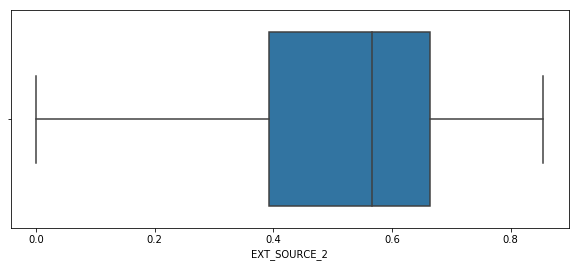

In [63]:
# Plotting a boxplot for EXT_SOURCE_2
plt.figure(figsize=(10,4))
sns.boxplot(appn_dt['EXT_SOURCE_2'])
plt.show()

##### Observation - 
Since the EXT_SOURCE_2 has no outliers , it can be imputed with the mean value which is 0.514

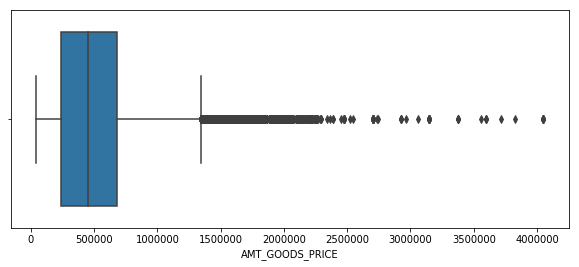

In [64]:
# Plotting a boxplot for AMT_GOODS_PRICE
plt.figure(figsize=(10,4))
sns.boxplot(appn_dt['AMT_GOODS_PRICE'])
plt.show()

##### Observations - 
The AMT_GOODS_PRICE has outliers , thus they can be imputed by median value which is 450000.

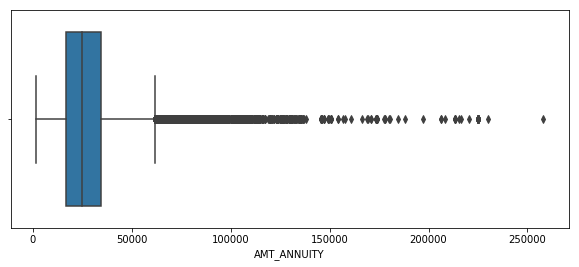

In [65]:
# Plotting a boxplot for AMT_ANNUITY
plt.figure(figsize=(10,4))
sns.boxplot(appn_dt['AMT_ANNUITY'])
plt.show()

##### Observations - 
The AMT_ANNUITY has outliers , it can be imputed with median i.e. 24903

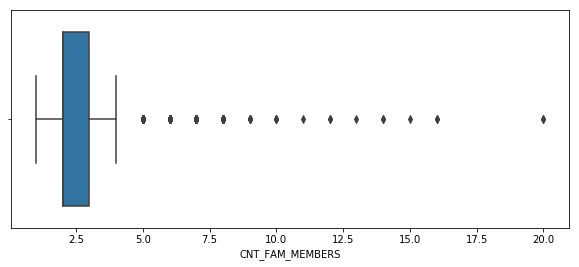

In [66]:
# Plotting a boxplot for CNT_FAM_MEMBERS
plt.figure(figsize=(10,4))
sns.boxplot(appn_dt['CNT_FAM_MEMBERS'])
plt.show()

In [67]:
# Checking the NAME_TYPE_SUITE column for imputation
appn_dt['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

##### Observations - 
NAME_TYPE_SUITE column is a categorical column and it can be imputed with mode which is Unaccompanied

In [68]:
# Checking the OCCUPATION_TYPE column
appn_dt['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

##### Observations - 
We can leave OCCUPATION_TYPE column with null values since it might have been an optional data which people refrained from filling 

In [69]:
# We can drop columns which are not important from analysis perspective

drop_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3']

In [70]:
appn_dt.drop(labels=drop_cols,axis=1,inplace=True)

In [71]:
# Dropping the Gender = XNA from the data set as there is not enough data available for that. 
appn_dt = appn_dt[appn_dt['CODE_GENDER']!='XNA']

In [72]:
# Checking shape after drropping columns
appn_dt.shape

(307507, 42)

In [73]:
appn_dt.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


## Binning of continuous variables

AMT_INCOME_TOTAL

In [74]:
appn_dt.AMT_INCOME_TOTAL.describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [75]:
appn_dt['AMT_INCOME_BUCKETS'] = pd.qcut( appn_dt.AMT_INCOME_TOTAL , q = [0,0.2,0.4,0.6,0.8,1] , 
                                        labels = ['Very Poor','Poor','Medium','Rich','Very Rich']  )

In [76]:
appn_dt['AMT_INCOME_BUCKETS'].value_counts(normalize=True)

Poor         0.278872
Rich         0.245562
Very Poor    0.207055
Very Rich    0.153223
Medium       0.115288
Name: AMT_INCOME_BUCKETS, dtype: float64

##### Observations - 
Almost half the data i.e. 48.5% comprises Very Poor and Poor category in the binning  

AMT_CREDIT

In [77]:
appn_dt.AMT_CREDIT.describe()

count    3.075070e+05
mean     5.990286e+05
std      4.024926e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [78]:
appn_dt['AMT_CREDIT_BUCKETS'] = pd.qcut( appn_dt.AMT_CREDIT , q = [0,0.2,0.4,0.6,0.8,1] , 
                                        labels = ['Very Low','Low','Medium','High','Very High']  )

In [79]:
appn_dt['AMT_CREDIT_BUCKETS'].value_counts(normalize=True)

Very Low     0.211133
High         0.208203
Medium       0.200161
Very High    0.191579
Low          0.188923
Name: AMT_CREDIT_BUCKETS, dtype: float64

AGE_BUCKETS

In [80]:
# Creating Age column 
appn_dt['AGE']=abs(appn_dt['DAYS_BIRTH'])//365.25

In [81]:
appn_dt.AGE.describe()

count    307507.000000
mean         43.405223
std          11.945763
min          20.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [82]:
appn_dt['AGE_BUCKETS'] = pd.cut(appn_dt['AGE'],bins=np.arange(20,70,5))

In [84]:
appn_dt.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BUCKETS,AMT_CREDIT_BUCKETS,AGE,AGE_BUCKETS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,Rich,Low,25,"(20, 25]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Rich,Very High,45,"(40, 45]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Poor,Very Low,52,"(50, 55]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,Poor,Low,52,"(50, 55]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Poor,Medium,54,"(50, 55]"


## Checking Data Imbalance

In [85]:
appn_dt.TARGET.value_counts(normalize=True)  # TARGET will be our target variable as it shows the defaulters and non-defaulters.

0    0.91927
1    0.08073
Name: TARGET, dtype: float64

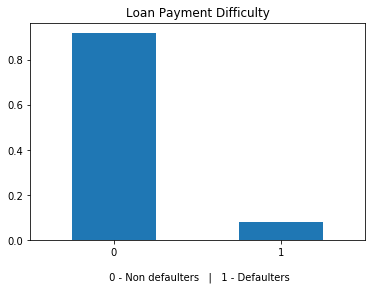

In [86]:
appn_dt.TARGET.value_counts(normalize=True).plot.bar()
plt.title("Loan Payment Difficulty")
plt.xlabel("\n 0 - Non defaulters   |   1 - Defaulters")
plt.xticks(rotation=0)
plt.show()

##### Observations - 
91.93% people repaid the loan while 8.07% people faced difficulties in repaying the loan.

In [87]:
# Dataframe of non-defaulters
default0 =  appn_dt[appn_dt['TARGET']==0]
default0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BUCKETS,AMT_CREDIT_BUCKETS,AGE,AGE_BUCKETS
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Rich,Very High,45,"(40, 45]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Poor,Very Low,52,"(50, 55]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,Poor,Low,52,"(50, 55]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Poor,Medium,54,"(50, 55]"
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,Very Poor,Medium,46,"(45, 50]"


In [88]:
# Dataframe of defaulters
default1 =  appn_dt[appn_dt['TARGET']==1]
default1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BUCKETS,AMT_CREDIT_BUCKETS,AGE,AGE_BUCKETS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,Rich,Low,25,"(20, 25]"
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,Cooking staff,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,10.0,1.0,10.0,0.0,-161.0,0.0,0.0,0.0,0.0,2.0,2.0,Poor,Very High,51,"(50, 55]"
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,Rich,Very High,47,"(45, 50]"
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,Sales staff,THURSDAY,11,0,0,0,0,0,0,Self-employed,1.0,0.0,1.0,0.0,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0,Poor,Low,36,"(35, 40]"
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,NaN,THURSDAY,10,0,0,0,0,0,0,XNA,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Poor,Very Low,67,NaN


## Univariate Analysis

### Univariate Categorical Variable Analysis

CODE_GENDER

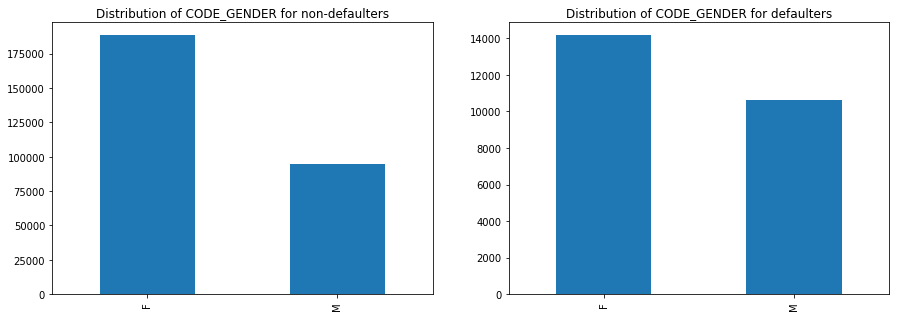

In [89]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
default0.CODE_GENDER.value_counts().plot.bar()
plt.title('Distribution of CODE_GENDER for non-defaulters')

# For defaulters
plt.subplot(1,2,2)
default1.CODE_GENDER.value_counts().plot.bar()
plt.title('Distribution of CODE_GENDER for defaulters')
plt.show()

##### Observations -
1) Female contribution is higher in defaulting ( 57% ) but at the same time female applicants are higher for loans. 
2) The defaulting rate for male is higher than female.

FLAG_OWN_CAR

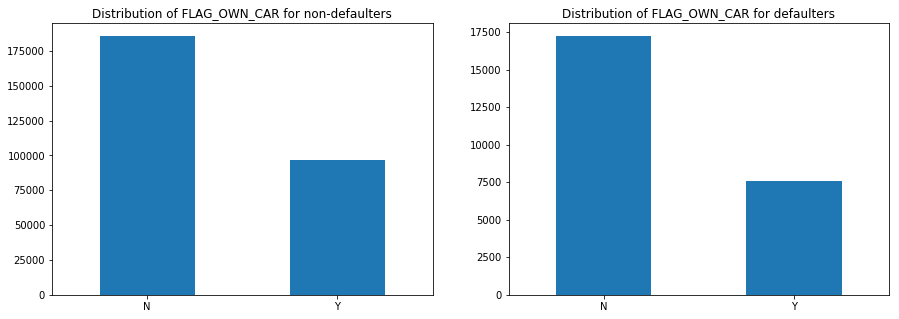

In [90]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
default0.FLAG_OWN_CAR.value_counts().plot.bar()
plt.title('Distribution of FLAG_OWN_CAR for non-defaulters')
plt.xticks(rotation=0)

# For defaulters
plt.subplot(1,2,2)
default1.FLAG_OWN_CAR.value_counts().plot.bar()
plt.title('Distribution of FLAG_OWN_CAR for defaulters')
plt.xticks(rotation=0)
plt.show()

##### Observations - 
30.5% defaulters own a car while in non-defaulters 34.3% people own a car.
Thus we can conclude from the chart that the rate of default for people having car is lower than those not having cars.


NAME_FAMILY_STATUS

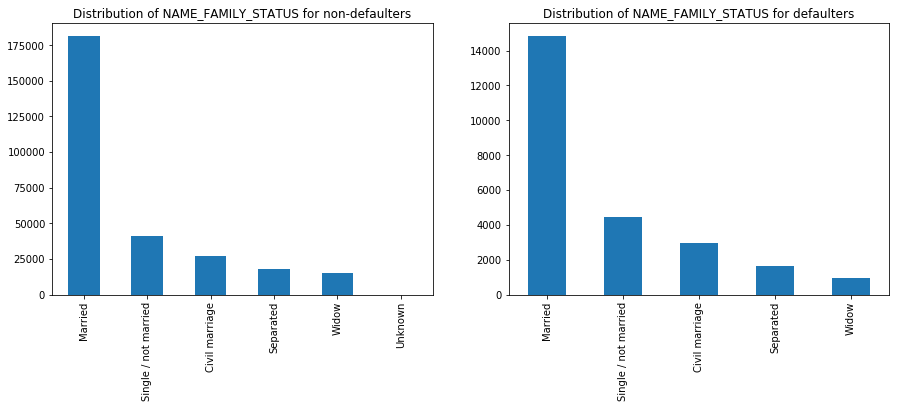

In [91]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
default0.NAME_FAMILY_STATUS.value_counts().plot.bar()
plt.title('Distribution of NAME_FAMILY_STATUS for non-defaulters')
plt.xticks(rotation=90)

# For defaulters
plt.subplot(1,2,2)
default1.NAME_FAMILY_STATUS.value_counts().plot.bar()
plt.title('Distribution of NAME_FAMILY_STATUS for defaulters')
plt.xticks(rotation=90)
plt.show()


##### Observations - 
Married people contribute more to defaulters which is nearly 60%. Also married people apply for loans comparatively more.

NAME_INCOME_TYPE

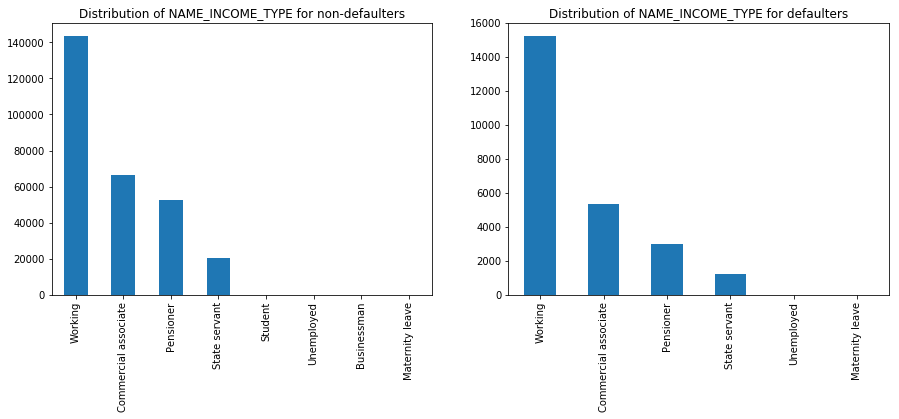

In [92]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
default0.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.title('Distribution of NAME_INCOME_TYPE for non-defaulters')
plt.xticks(rotation=90)

# For defaulters
plt.subplot(1,2,2)
default1.NAME_INCOME_TYPE.value_counts().plot.bar()
plt.title('Distribution of NAME_INCOME_TYPE for defaulters')
plt.xticks(rotation=90)
plt.show()


##### Observations -
Most of the loan is availed by working group. That might be the reason that more working class people default.
 Students and Business persons do not default.

NAME_HOUSING_TYPE

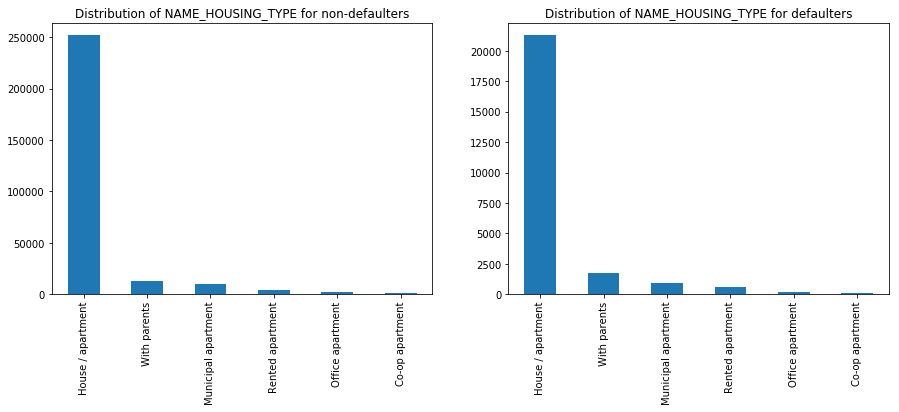

In [93]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
default0.NAME_HOUSING_TYPE.value_counts().plot.bar()
plt.title('Distribution of NAME_HOUSING_TYPE for non-defaulters')
plt.xticks(rotation=90)

# For defaulters
plt.subplot(1,2,2)
default1.NAME_HOUSING_TYPE.value_counts().plot.bar()
plt.title('Distribution of NAME_HOUSING_TYPE for defaulters')
plt.xticks(rotation=90)
plt.show()


##### Observations - 
People living in House/Apartment apply more for loans and also have higher contribution in defaulting. 
 People living with parents tend to default more.

### Univariate Categorical Ordered Analysis

AGE_BUCKETS

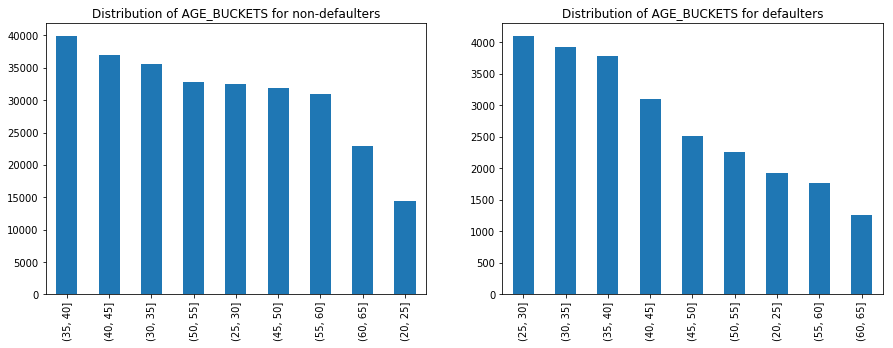

In [94]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
default0.AGE_BUCKETS.value_counts().plot.bar()
plt.title('Distribution of AGE_BUCKETS for non-defaulters')
plt.xticks(rotation=90)

# For defaulters
plt.subplot(1,2,2)
default1.AGE_BUCKETS.value_counts().plot.bar()
plt.title('Distribution of AGE_BUCKETS for defaulters')
plt.xticks(rotation=90)
plt.show()

##### Observations - 
Age group of 25-30 is defaulting more. Thus people in that age group are riskier to give loan.
People in the age group 60-65 defaulting less and are comparitively safer to give loans.

AMT_INCOME_BUCKETS

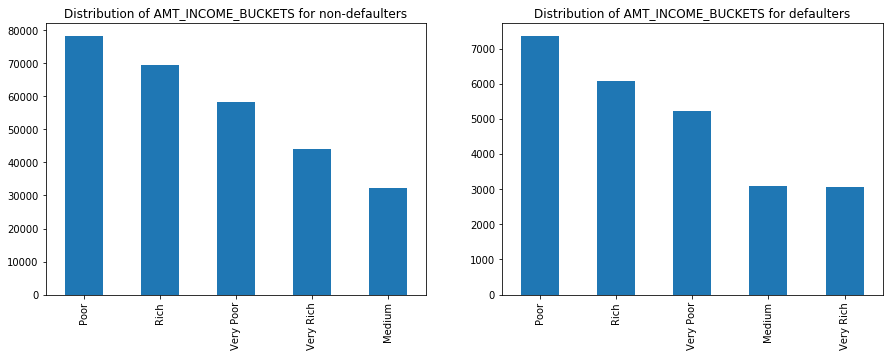

In [95]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
default0.AMT_INCOME_BUCKETS.value_counts().plot.bar()
plt.title('Distribution of AMT_INCOME_BUCKETS for non-defaulters')
plt.xticks(rotation=90)

# For defaulters
plt.subplot(1,2,2)
default1.AMT_INCOME_BUCKETS.value_counts().plot.bar()
plt.title('Distribution of AMT_INCOME_BUCKETS for defaulters')
plt.xticks(rotation=90)
plt.show()

##### Observations - 
Poor and Rich people have default rate 30% and 25% respectively. People in Very Rich category perform better and have lowest default rate 12.4% 

NAME_EDUCATION_TYPE

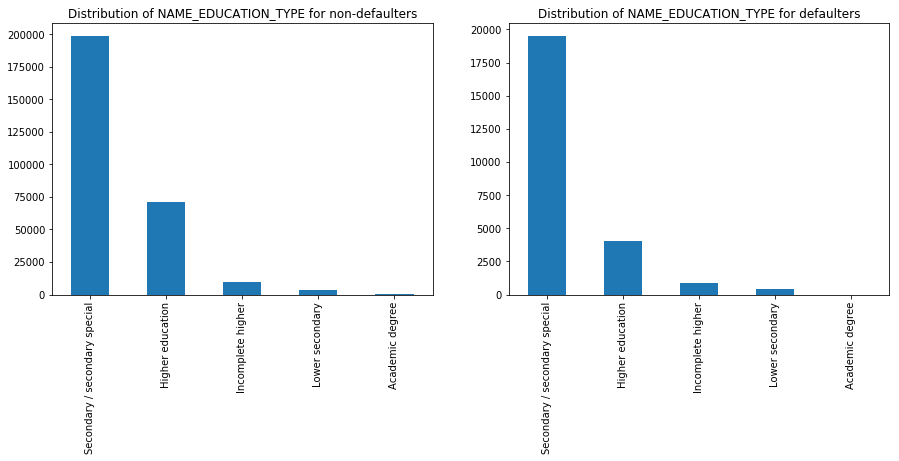

In [96]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
default0.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.title('Distribution of NAME_EDUCATION_TYPE for non-defaulters')
plt.xticks(rotation=90)

# For defaulters
plt.subplot(1,2,2)
default1.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.title('Distribution of NAME_EDUCATION_TYPE for defaulters')
plt.xticks(rotation=90)
plt.show()

##### Observations - 
Secondary category avails 70% loan and has 78% contribution in defaulters. Academic degree category has least chance of default.

OCCUPATION_TYPE

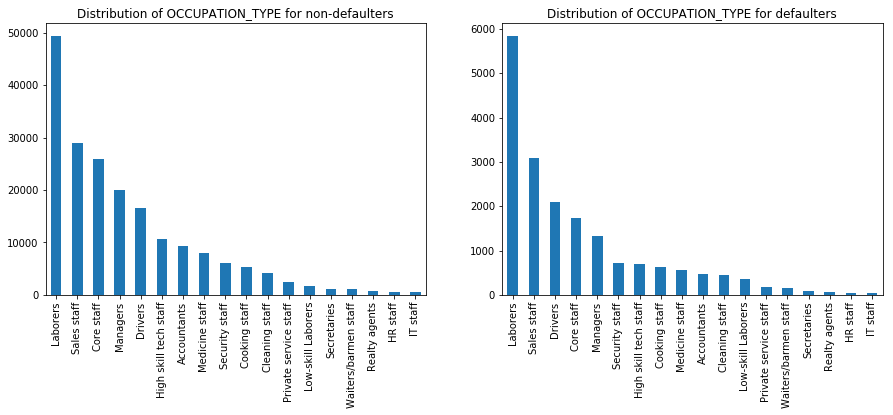

In [97]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
default0.OCCUPATION_TYPE.value_counts() .plot.bar()
plt.title('Distribution of OCCUPATION_TYPE for non-defaulters')
plt.xticks(rotation=90)

# For defaulters
plt.subplot(1,2,2)
default1.OCCUPATION_TYPE.value_counts().plot.bar()
plt.title('Distribution of OCCUPATION_TYPE for defaulters')
plt.xticks(rotation=90)
plt.show()

##### Observations -
Labourers are the riskier group to give loan to as this group avail more loan and also defaults more too.

## Univariate Continuous Variable Analysis

CNT_CHILDREN

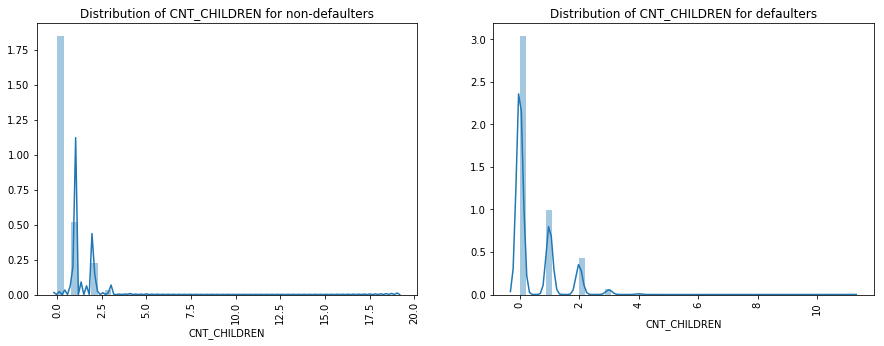

In [98]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(default0.CNT_CHILDREN)
plt.title('Distribution of CNT_CHILDREN for non-defaulters')
plt.xticks(rotation=90)


# For defaulters
plt.subplot(1,2,2)
sns.distplot(default1.CNT_CHILDREN)
plt.title('Distribution of CNT_CHILDREN for defaulters')
plt.xticks(rotation=90)
plt.show()

##### Observations - 
67% of the defaulters have 0 children. Thus people having no children should be given loan cautiously by inspecting other parameters.

AMT_CREDIT

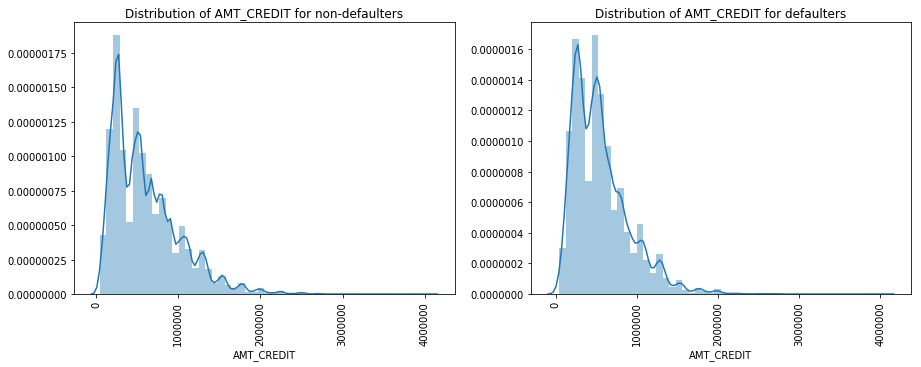

In [99]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(default0.AMT_CREDIT)
plt.title('Distribution of AMT_CREDIT for non-defaulters')
plt.xticks(rotation=90)

# For defaulters
plt.subplot(1,2,2)
sns.distplot(default1.AMT_CREDIT)
plt.title('Distribution of AMT_CREDIT for defaulters')
plt.xticks(rotation=90)
plt.show()

AMT_GOODS_PRICE

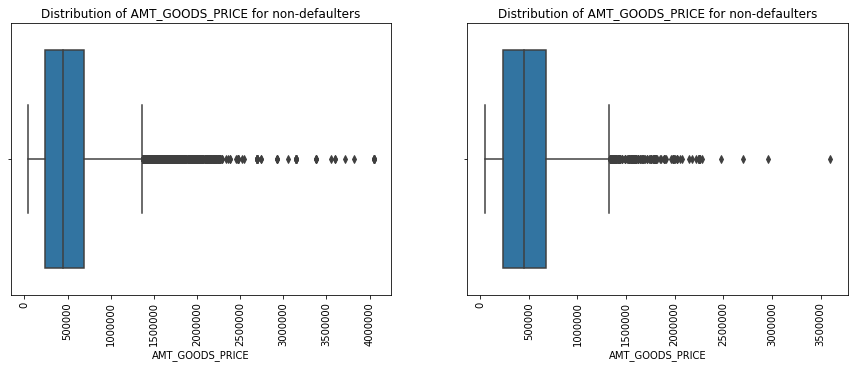

In [100]:
# For non-defaulters
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(default0.AMT_GOODS_PRICE)
plt.title('Distribution of AMT_GOODS_PRICE for non-defaulters')
plt.xticks(rotation=90)



# For defaulters
plt.subplot(1,2,2)
sns.boxplot(default1.AMT_GOODS_PRICE)
plt.title('Distribution of AMT_GOODS_PRICE for non-defaulters')
plt.xticks(rotation=90)
plt.show()

##### Observations - 
Maximum people have availed loan for goods having price between 2.5 lakhs to 6.5 lakhs.

## Top 10 Correlation

In [101]:
# Top 10 correlations in default0
corr=default0.corr()
corr_dt = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_dt.columns=['Column1','Column2','Correlation']
corr_dt.dropna(subset=['Correlation'],inplace=True)
corr_dt['Abs_Correlation']=corr_dt['Correlation'].abs()
corr_dt = corr_dt.sort_values(by=['Abs_Correlation'], ascending=False)
corr_dt.head(10)

,Column1,Column2,Correlation,Abs_Correlation
938,AGE,DAYS_BIRTH,-0.999711,0.999711
670,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508,0.998508
190,AMT_GOODS_PRICE,AMT_CREDIT,0.987253,0.987253
479,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861,0.861861
702,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859289,0.859289
575,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381,0.830381
191,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
159,AMT_ANNUITY,AMT_CREDIT,0.771308,0.771308
287,DAYS_EMPLOYED,DAYS_BIRTH,-0.618051,0.618051
939,AGE,DAYS_EMPLOYED,0.618000,0.618000


In [102]:
# Top 10 correlations in default1
corr=default1.corr()
corr_dt = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_dt.columns=['Column1','Column2','Correlation']
corr_dt.dropna(subset=['Correlation'],inplace=True)
corr_dt['Abs_Correlation']=corr_dt['Correlation'].abs()
corr_dt = corr_dt.sort_values(by=['Abs_Correlation'], ascending=False)
corr_dt.head(10)

,Column1,Column2,Correlation,Abs_Correlation
938,AGE,DAYS_BIRTH,-0.999691,0.999691
670,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269,0.998269
190,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
702,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994,0.868994
479,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885,0.847885
575,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540,0.778540
191,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
159,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
939,AGE,DAYS_EMPLOYED,0.575221,0.575221
287,DAYS_EMPLOYED,DAYS_BIRTH,-0.575097,0.575097


## Bivariate Analysis

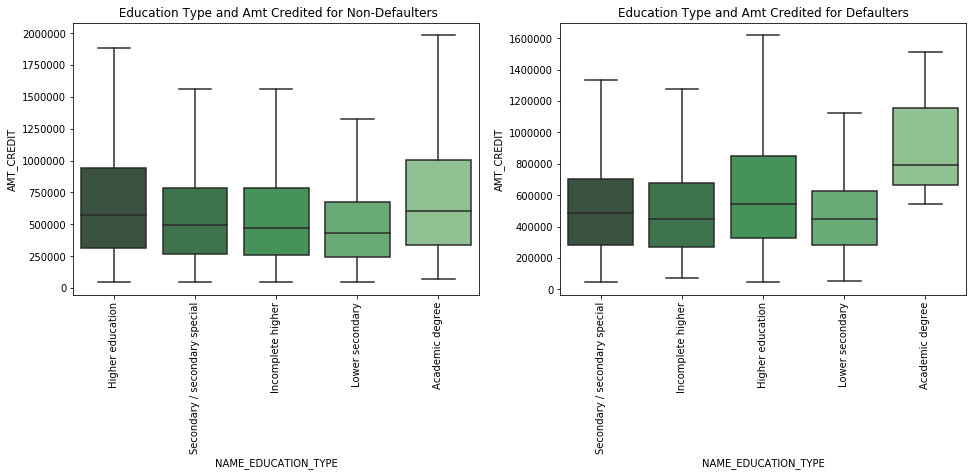

In [103]:
# NAME_EDUCATION_TYPE Vs AMT_CREDIT

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
plt.title(" Education Type and Amt Credited for Non-Defaulters")
plt.xticks(rotation=90)
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =default0, showfliers=False, palette="Greens_d")


plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Defaulters")
plt.xticks(rotation=90)
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = default1, showfliers=False, palette="Greens_d")
plt.show() 

##### Observations - 
Median value for Very Rich category is highest in defaulters 
but the loan availed by this category is very less comapred to others. Thus, no strong conclusion can be drawn.

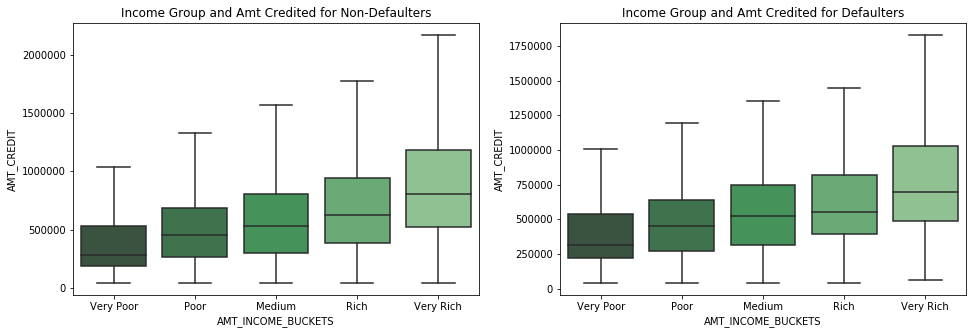

In [104]:
# INCOME_GROUP vs AMT_CREDIT 

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amt Credited for Non-Defaulters")
sns.boxplot(x = 'AMT_INCOME_BUCKETS', y = 'AMT_CREDIT', data =default0, showfliers=False, palette="Greens_d")

plt.subplot(1,2,2)
plt.title("Income Group and Amt Credited for Defaulters")
sns.boxplot(x = 'AMT_INCOME_BUCKETS', y = 'AMT_CREDIT', data = default1, showfliers=False, palette="Greens_d")
plt.show()

##### Observations - 
Default value per loan is higher in Very Rich category people also they have higher amount in credited loan.
Thus, bank should devise a policy to deal with Very Rich category as they accumulate most capital.

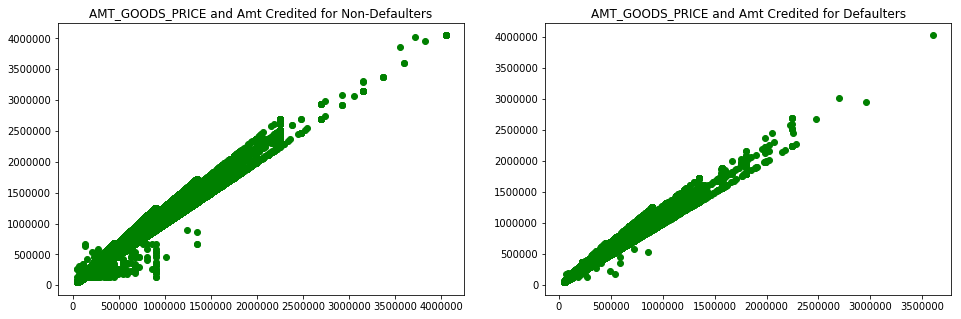

In [105]:
# AMT_GOODS_PRICE Vs AMT_CREDIT

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
plt.title("AMT_GOODS_PRICE and Amt Credited for Non-Defaulters")
plt.scatter(x = 'AMT_GOODS_PRICE', y = 'AMT_CREDIT', data =default0, color = 'green')

plt.subplot(1,2,2)
plt.title("AMT_GOODS_PRICE and Amt Credited for Defaulters")
plt.scatter(x = 'AMT_GOODS_PRICE', y = 'AMT_CREDIT', data = default1, color = 'green')
plt.show()

##### Observations - 
There is positive corelation in AMT_GOODS_PRICE and AMT_CREDIT. 
Thus, as the goods price for which loan is being taken is increasing , credit loan is increasing and this is same for defaulters and non-defaulters.

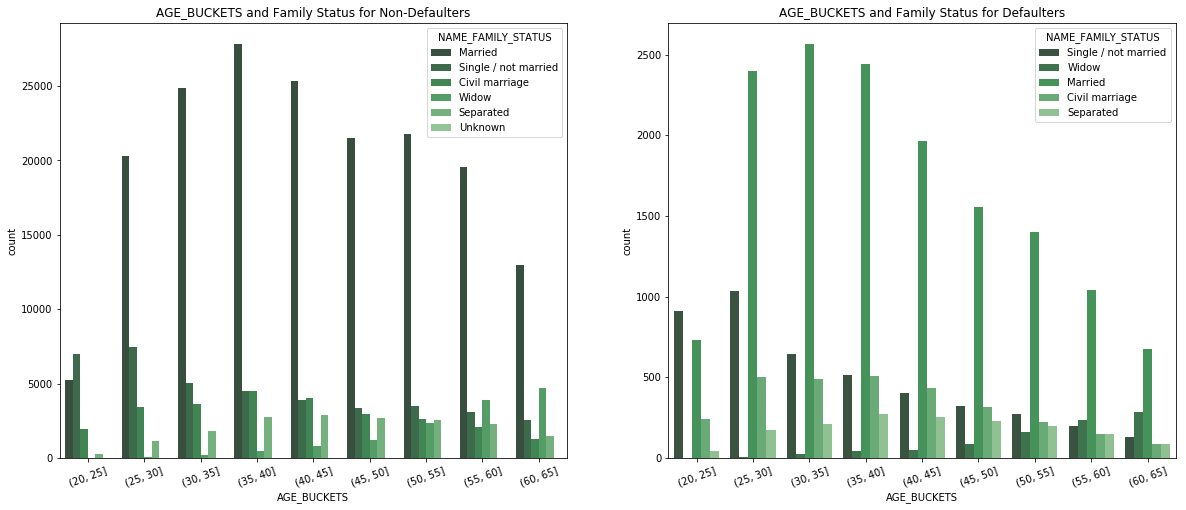

In [106]:
# AGE_BUCKETS Vs NAME_FAMILY_STATUS

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title("AGE_BUCKETS and Family Status for Non-Defaulters")
sns.countplot('AGE_BUCKETS', hue ='NAME_FAMILY_STATUS' , data =default0, palette="Greens_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("AGE_BUCKETS and Family Status for Defaulters")
sns.countplot('AGE_BUCKETS', hue ='NAME_FAMILY_STATUS' , data =default1, palette="Greens_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)

plt.show()

##### Observations - 
Largest defaulting group of applicants is in married category in age group between 25-30 and 35-45.

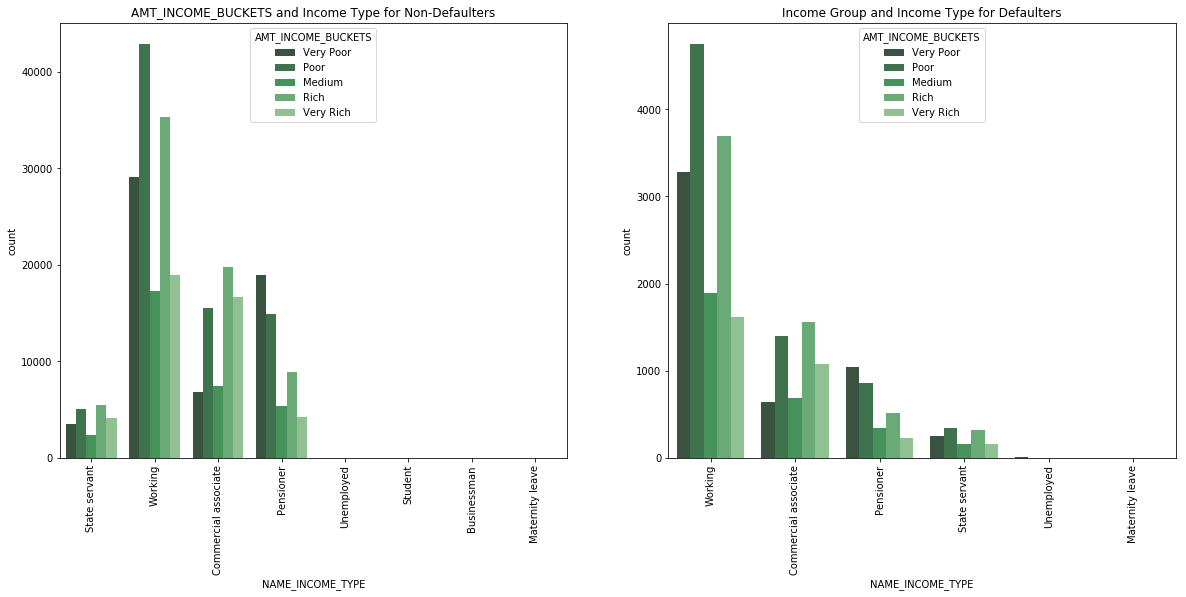

In [107]:
# NAME_INCOME_TYPE Vs AMT_INCOME_BUCKETS

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title("AMT_INCOME_BUCKETS and Income Type for Non-Defaulters")
sns.countplot('NAME_INCOME_TYPE', hue = 'AMT_INCOME_BUCKETS', data =default0, palette="Greens_d")
plt.xticks(rotation=90, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Income Group and Income Type for Defaulters")
sns.countplot('NAME_INCOME_TYPE', hue = 'AMT_INCOME_BUCKETS', data =default1, palette="Greens_d")
plt.xticks(rotation=90, fontsize= 10,fontweight= 2)

plt.show()

##### Observation - 
Medium income group with income type defaults 1 in 12 times. Higher than the average of 1 in 11 defaults.

# Analysis of Previous Application Data

## Data Loading

In [110]:
prev_appn_dt =pd.read_csv('previous_application.csv')
# Reading the previous application data
prev_appn_dt.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Data Inspection

In [111]:
# Checking data shape
prev_appn_dt.shape

(1670214, 37)

##### Note - Data contains 1670214 rows and 37 columns

In [112]:
# Checking data size
prev_appn_dt.size

61797918

In [113]:
# Checking the information of the data
prev_appn_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [114]:
#Checking the data types in given data
prev_appn_dt.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [115]:
# Checking statistical values of data
appn_dt.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,307507.000000,307507.00000,307507.000000,3.075070e+05,3.075070e+05,307495.000000,3.072290e+05,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,306486.000000,306486.000000,306486.000000,306486.000000,307506.000000,265988.000000,265988.000000,265988.000000,265988.000000,265988.000000,265988.000000,307507.000000
mean,278181.527256,0.08073,0.417047,1.687977e+05,5.990286e+05,27108.666786,5.383977e+05,0.020868,-16037.027271,63815.929208,-4986.131376,-2994.201670,12.063394,0.015144,0.050770,0.040659,0.078174,0.230457,0.179557,1.422209,0.143406,1.405255,0.100034,-962.860546,0.006403,0.007000,0.034362,0.267388,0.265474,1.899950,43.405223
std,102790.132982,0.27242,0.722119,2.371246e+05,4.024926e+05,14493.798379,3.694472e+05,0.013831,4363.982424,141276.472519,3522.883030,1509.454566,3.265835,0.122127,0.219527,0.197500,0.268445,0.421126,0.383819,2.400931,0.446644,2.379744,0.362221,826.811491,0.083850,0.110758,0.204686,0.915994,0.794060,1.869286,11.945763
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,189146.500000,0.00000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,278203.000000,0.00000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
75%,367143.500000,0.00000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000
max,456255.000000,1.00000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000


## Data Cleaning

In [116]:
# Checking the missing values in the columns.
prev_appn_dt.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [117]:
# Checking percentage of missing values in the columns
prev_appn_dt.isnull().sum()/len(prev_appn_dt) * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

## Handling Missing Values

In [118]:
# Removing columns having more than 40% of null values
prev_appn_dt = prev_appn_dt.loc[:,prev_appn_dt.isnull().mean()<=0.4]
prev_appn_dt.shape

(1670214, 26)

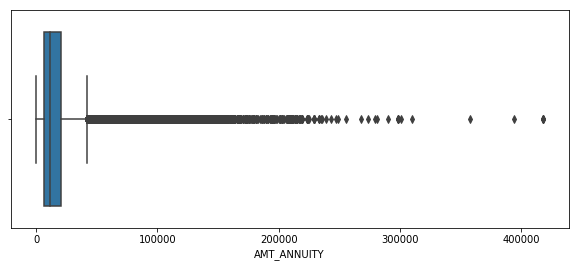

In [119]:
# Plotting a boxplot for AMT_ANNUITY
plt.figure(figsize=(10,4))
sns.boxplot(prev_appn_dt['AMT_ANNUITY'])
plt.show()

##### Observations - 
From the boxplot we can see that AMT_ANNUITY has outliers. These can be replaced with median value i.e. 11250

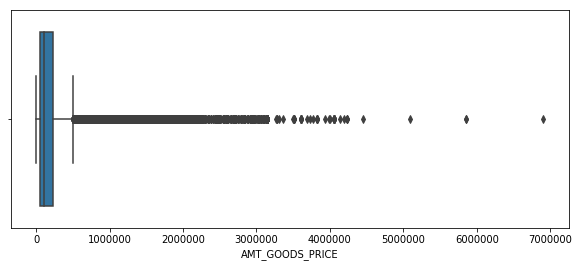

In [120]:
# Plotting a boxplot for AMT_GOODS_PRICE
plt.figure(figsize=(10,4))
sns.boxplot(prev_appn_dt['AMT_GOODS_PRICE'])
plt.show()

##### Observations - 
From the boxplot we can see that AMT_GOODS_PRICE has outliers. These can be replaced with median value i.e. 112320

## Univariate Analysis

NAME_CONTRACT_TYPE

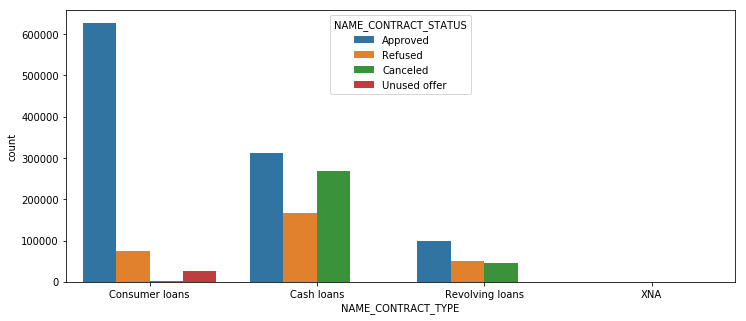

In [121]:
plt.figure(figsize = (12,5))
sns.countplot(x='NAME_CONTRACT_TYPE', data=prev_appn_dt,hue='NAME_CONTRACT_STATUS')
plt.show()

##### Observations - 
Most of the loans which are given are Consumer loans and Cash loans.
Consumer loans are highly approved while Cash loans have high number of refusal and cancellation.

NAME_PAYMENT_TYPE

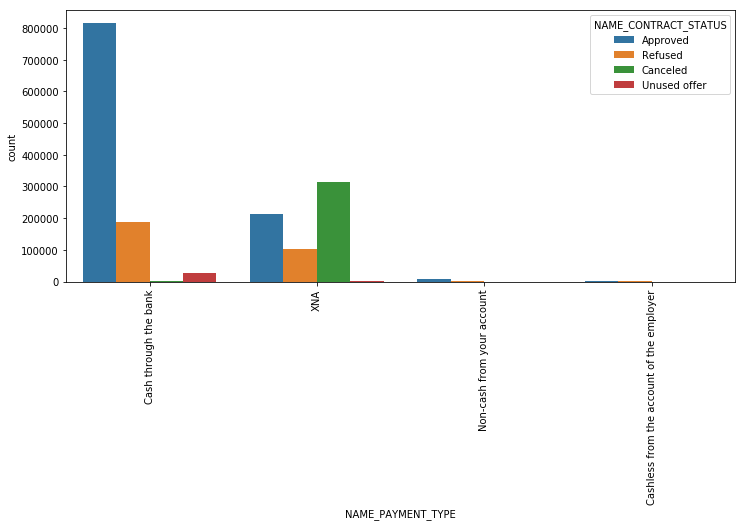

In [122]:
plt.figure(figsize = (12,5))
sns.countplot(x='NAME_PAYMENT_TYPE', data=prev_appn_dt,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.show()

##### Observations - 
From above plot we can infer that most people preferred to repay the loan using the Cash through the bank option.

NAME_CLIENT_TYPE

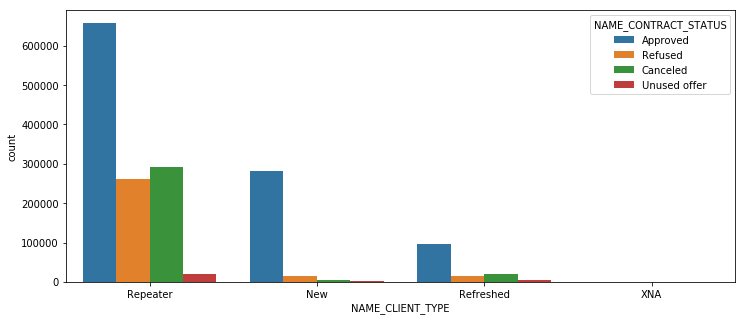

In [123]:
plt.figure(figsize = (12,5))
sns.countplot(x='NAME_CLIENT_TYPE', data=prev_appn_dt,hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=0)
plt.show()

##### Observations - 
Most clients are reapeat customers in application. Though they have higher approval rate but they also have higher refusals.
From data it can also be inferred that New applicants get approval mostly.

## Correlation for Previous Application Data

In [128]:
corr= prev_appn_dt.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
58,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
59,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
47,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
57,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
46,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
35,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
113,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
114,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278
115,CNT_PAYMENT,AMT_GOODS_PRICE,0.672129,0.672129
112,CNT_PAYMENT,AMT_ANNUITY,0.394535,0.394535


## Bivariate Analysis

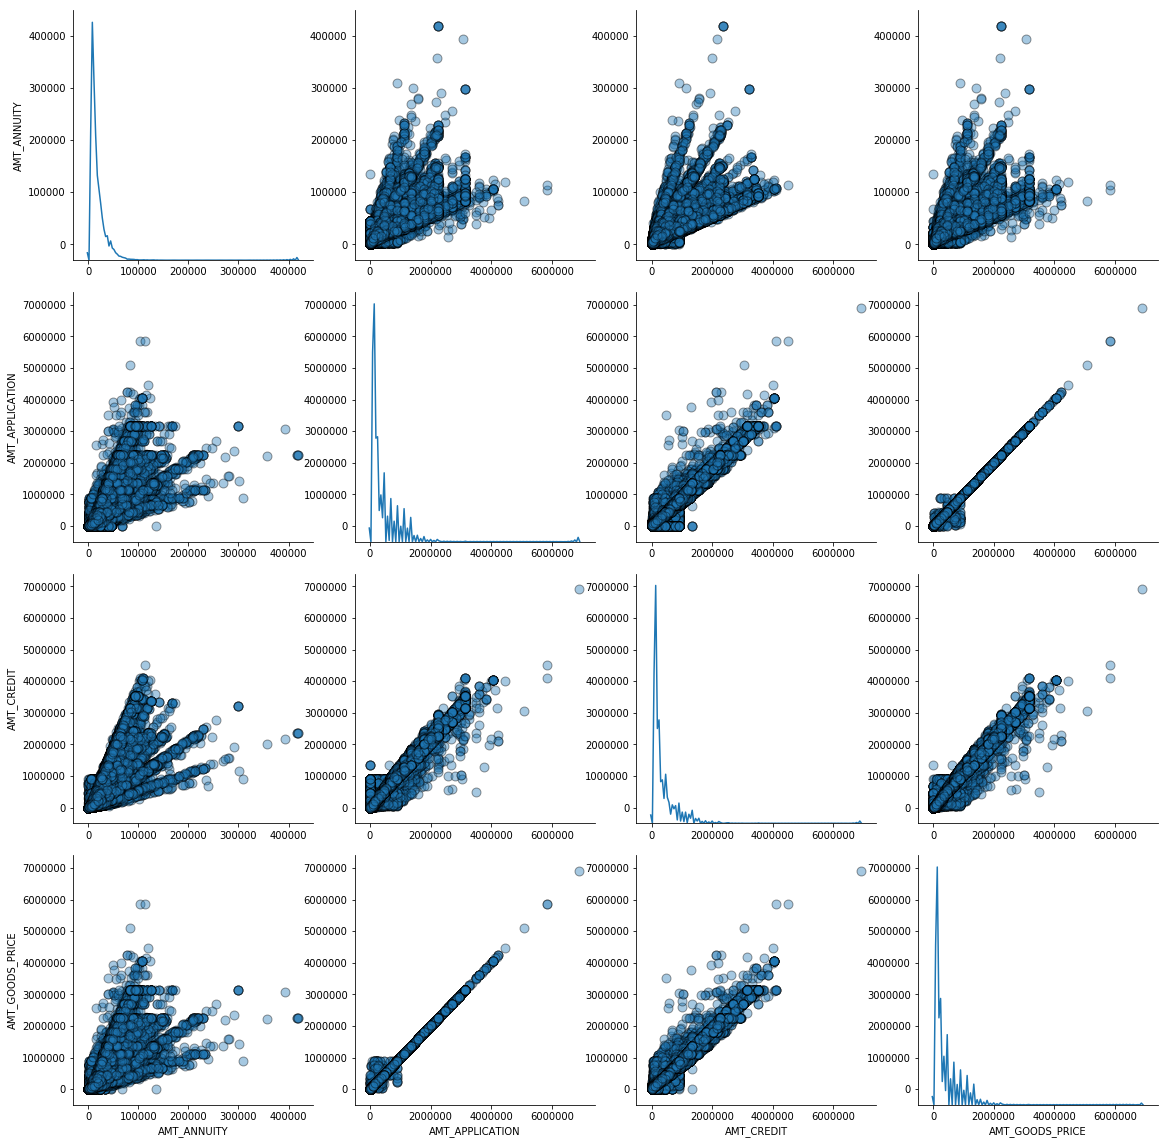

In [126]:
# Plotting the relation between highly corelated numeric variables

plt.figure(figsize=[20,8])
sns.pairplot(prev_appn_dt[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

##### Observations - 
Annuity has very high and positive influence over: (Below factors increase with Increase of annuity)
    
(1) Credit demand of client in the previous application

(2) Final credit amount on the previous application that was approved by the bank.

(3) Goods price for which loan was taken in the previous application.

Credit demand in the previous application is highly influenced by the Goods price.

Final credit amount disbursed to the customer previously, after approval is highly influenced by the application amount and also the goods price of good that client asked for on the previous application.

NAME_CONTRACT_STATUS  Vs  AMT_ANNUITY

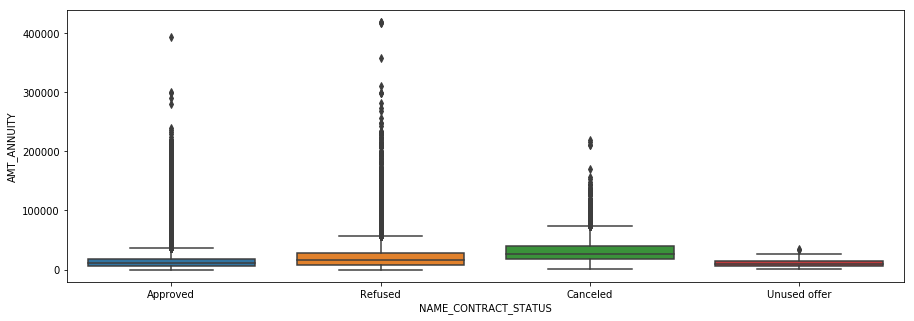

In [130]:
plt.figure(figsize=(15,5))
sns.boxplot(x='NAME_CONTRACT_STATUS',y = 'AMT_ANNUITY', data=prev_appn_dt)
plt.show()

##### Observations - 
From the above plot we can infer that loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time.
We can also see that applications with too high AMT ANNUITY also got refused more often than others.

## Multivariate Analysis

NAME_CONTRACT_STATUS Vs NAME_CLIENT_TYPE Vs AMT_APPLICATION

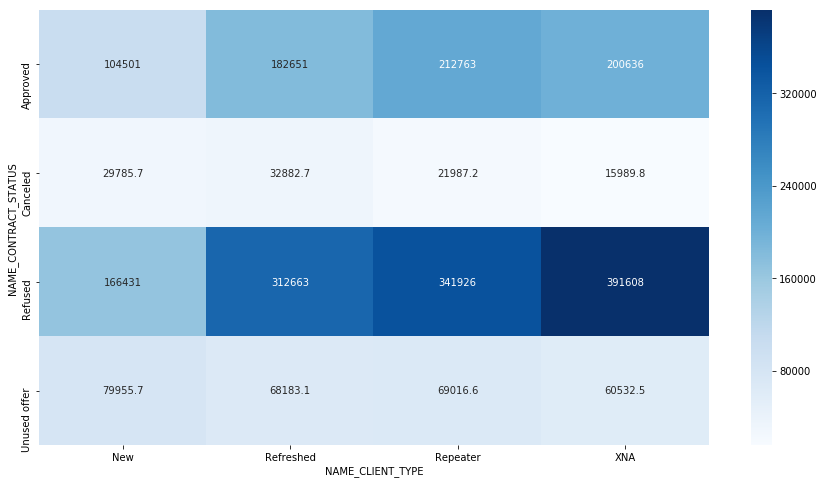

In [132]:
result = pd.pivot_table(data=prev_appn_dt, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(result, annot=True,cmap='Blues', fmt="g")
plt.show()

##### Observations - 
Unused offer applications are low.
Refusal rate of applications is high.
Approval rate is moderately high.

## Merging Dataframes

In [133]:
merged_dt = pd.merge( appn_dt,prev_appn_dt, how='left', on="SK_ID_CURR")
merged_dt.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_BUCKETS,AMT_CREDIT_BUCKETS,AGE,AGE_BUCKETS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,Rich,Low,25,"(20, 25]",1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Rich,Very High,45,"(40, 45]",1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Rich,Very High,45,"(40, 45]",2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Rich,Very High,45,"(40, 45]",2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Poor,Very Low,52,"(50, 55]",1564014.0,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,-815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest


In [134]:
# Analysisng merged dataframe
merged_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 71 columns):
SK_ID_CURR                      1430100 non-null int64
TARGET                          1430100 non-null int64
NAME_CONTRACT_TYPE_x            1430100 non-null object
CODE_GENDER                     1430100 non-null object
FLAG_OWN_CAR                    1430100 non-null object
FLAG_OWN_REALTY                 1430100 non-null object
CNT_CHILDREN                    1430100 non-null int64
AMT_INCOME_TOTAL                1430100 non-null float64
AMT_CREDIT_x                    1430100 non-null float64
AMT_ANNUITY_x                   1430007 non-null float64
AMT_GOODS_PRICE_x               1428881 non-null float64
NAME_TYPE_SUITE                 1426069 non-null object
NAME_INCOME_TYPE                1430100 non-null object
NAME_EDUCATION_TYPE             1430100 non-null object
NAME_FAMILY_STATUS              1430100 non-null object
NAME_HOUSING_TYPE               1430100 non-nu

In [135]:
def plot_merged(varx,vary):
    
    plt.style.use('ggplot')
    sns.despine
    new_dt = merged_dt.pivot_table(values='SK_ID_CURR', 
                      index=varx,
                      columns=vary,
                      aggfunc='count')
    new_dt = new_dt.div(new_dt.sum(axis=1),axis='rows')*100
    sns.set()
    new_dt.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {varx} on Loan Approval')
    plt.xlabel(f'{varx}')
    plt.ylabel(f'{vary}%')
    plt.show()

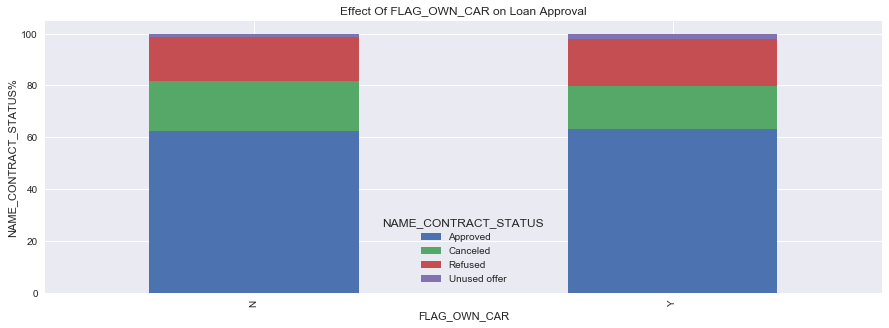

In [136]:
plot_merged('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

##### Observation - 
From above plot we can see that car ownership do not any have effect with respect to loan approval or refusal.
But as inferred earlier people have car, default less.
Bank can give more weightage to car ownership while approving the loan.

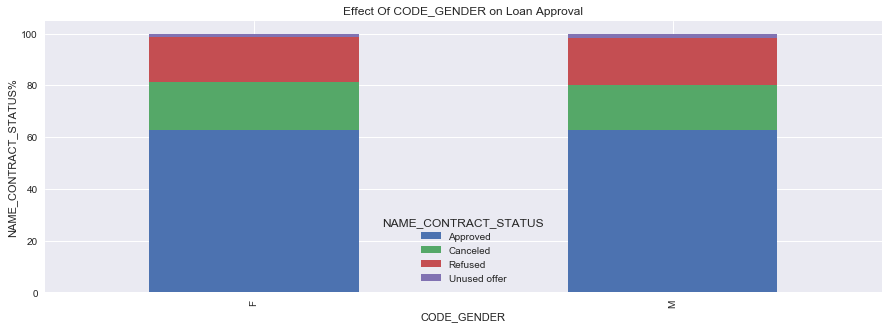

In [140]:
plot_merged('CODE_GENDER','NAME_CONTRACT_STATUS')

##### Observations - 
From above plot we can see that Gender Code do not have any effect with respect to loan approval or refusal.
But we saw earlier that male have higher rate of default compared to females. 
The bank can add more weightage to female while approving a loan amount.

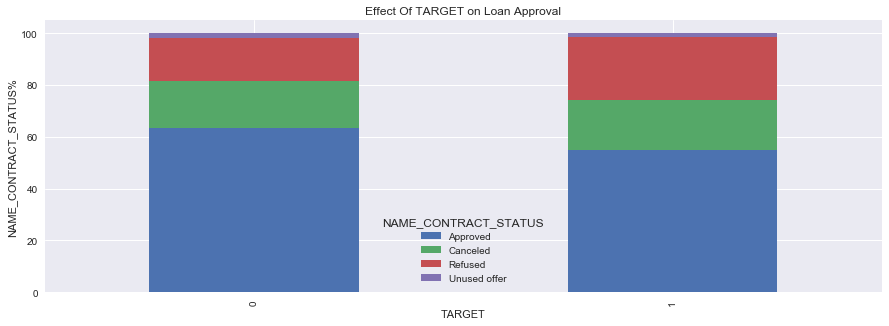

In [139]:
plot_merged('TARGET','NAME_CONTRACT_STATUS')

##### Observations - 
From the above plot we can see that the people who were approved for a loan earlier,
defaulted less often where as people who had been refused a loan by bank earlier have higher chances of defaulting.